In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.keras.layers import Dense , Dropout , Conv2D , MaxPooling2D, Flatten , BatchNormalization

from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.cifar10.load_data()


170498071/170498071 [==============================] - 2s 0us/step


In [3]:
print('Shape of x_train is {}'.format(x_train.shape))
print('Shape of x_test is {}'.format(x_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))


Shape of x_train is (50000, 32, 32, 3)
Shape of x_test is (10000, 32, 32, 3)
Shape of y_train is (50000, 1)
Shape of y_test is (10000, 1)


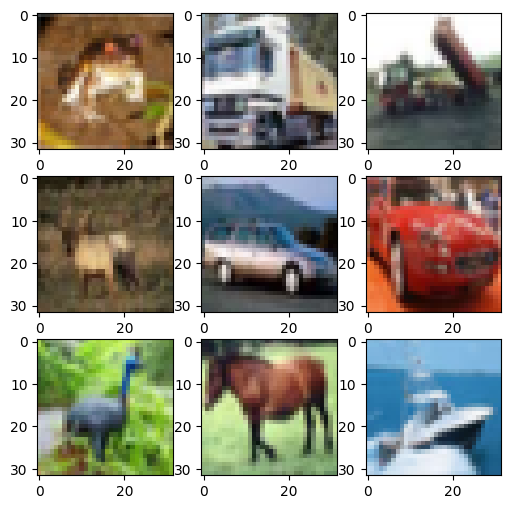

In [5]:
plt.figure(figsize=(6,6))
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    img = x_train[i]
    plt.imshow(img)

# show the plot
plt.show()

In [6]:
def normalize(x):
    x = x.astype('float32')
    x = x/255.0
    return x

datagen = ImageDataGenerator(
                            rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True,
)

In [7]:
from sklearn.model_selection import train_test_split
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size = 0.5, random_state = 0)

In [8]:
x_train = normalize(x_train)
x_test = normalize(x_test)
x_val = normalize(x_val)

y_train = tf.keras.utils.to_categorical(y_train , 10)
y_test = tf.keras.utils.to_categorical(y_test , 10)
y_val  = tf.keras.utils.to_categorical(y_val , 10)

datagen.fit(x_train)

In [9]:
def results(model):
  epoch = 100

  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Classification Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='lower right')
  plt.savefig("Classification Accuracy")
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='lower right')
  plt.savefig("Model loss")
  plt.show()

In [10]:
weight_decay = 1e-4
model = Sequential([
                    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), input_shape=(32, 32, 3)),
                    BatchNormalization(),
                    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),
                    Dropout(0.2),

                    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),
                    Dropout(0.3),

                    Conv2D(256, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    Conv2D(256, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2, 2)),
                    Dropout(0.4),

                    Flatten(),
                    Dense(256, activation='relu'),
                    BatchNormalization(),
                    Dropout(0.5),
                    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                        

In [11]:
opt =    tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [12]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
callbacks = [ ReduceLROnPlateau(monitor='val_loss',
                                patience=10,
                                cooldown=1,
                                verbose=1),
              EarlyStopping(monitor='val_loss',
                            min_delta=1e-4,
                            patience=15)]

In [13]:
epoch = 200
history = model.fit(datagen.flow(x_train , y_train , batch_size = 64), epochs = epoch, steps_per_epoch=len(x_train)/64, validation_data = (x_val , y_val) , verbose = 1, callbacks=callbacks)


Epoch 1/200
781/781 [==============================] - 52s 48ms/step - loss: 1.7372 - accuracy: 0.4377 - val_loss: 1.3542 - val_accuracy: 0.5624 - lr: 0.0010
Epoch 2/200
781/781 [==============================] - 34s 43ms/step - loss: 1.1664 - accuracy: 0.6181 - val_loss: 1.1144 - val_accuracy: 0.6538 - lr: 0.0010
Epoch 3/200
781/781 [==============================] - 35s 44ms/step - loss: 1.0028 - accuracy: 0.6839 - val_loss: 0.8736 - val_accuracy: 0.7388 - lr: 0.0010
Epoch 4/200
781/781 [==============================] - 35s 44ms/step - loss: 0.9239 - accuracy: 0.7193 - val_loss: 0.8724 - val_accuracy: 0.7538 - lr: 0.0010
Epoch 5/200
781/781 [==============================] - 34s 43ms/step - loss: 0.8773 - accuracy: 0.7461 - val_loss: 0.8958 - val_accuracy: 0.7578 - lr: 0.0010
Epoch 6/200
781/781 [==============================] - 35s 44ms/step - loss: 0.8426 - accuracy: 0.7667 - val_loss: 0.8600 - val_accuracy: 0.7890 - lr: 0.0010
Epoch 7/200
781/781 [==============================]

In [14]:
acc = model.evaluate(x_test , y_test)
print("test set loss : " , acc[0])
print("test set accuracy :", acc[1]*100)

157/157 [==============================] - 1s 4ms/step - loss: 0.4105 - accuracy: 0.9206
test set loss :  0.41052278876304626
test set accuracy : 92.05999970436096


In [15]:
model.save("cnn.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
